In [82]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, pareto
from matplotlib import colormaps 
import itertools
from scipy.ndimage import gaussian_filter
from tqdm import tqdm
from scipy import interpolate
import pandas as pd
from scipy.ndimage import gaussian_filter1d


In [100]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

def remove_nan_values(x_values, y_values):
    """
    Remove NaN values from y_values and the corresponding indices from x_values.

    Parameters:
    x_values (list or np.array): The x-values.
    y_values (list or np.array): The y-values from which to remove NaN values.

    Returns:
    tuple: Two lists, the first with NaN-free x_values and the second with NaN-free y_values.
    """
    cleaned_x_values = [x for x, y in zip(x_values, y_values) if not np.isnan(y)]
    cleaned_y_values = [y for y in y_values if not np.isnan(y)]
    return cleaned_x_values, cleaned_y_values
"""    leny = len(y_values)
    for i in range(leny):
        if np.isnan(y_values[i]):
            del y_values[i]
            del x_values[i]
    return x_values, y_values
"""

def smooth_posterior(x_values, posterior_values, sigma=2):
    """
    Smooth the posterior values using a Gaussian filter.

    Parameters:
    x_values (np.array): The x-values of the posterior.
    posterior_values (np.array): The posterior values to be smoothed.
    sigma (float): The standard deviation for the Gaussian filter. Default is 2.

    Returns:
    np.array: The smoothed posterior values.
    """
    smoothed_posterior = gaussian_filter1d(posterior_values, sigma)
    return x_values, smoothed_posterior

#HELPER FUNCTIONS
def sort_linked_lists(list1, list2):
    # Pair corresponding elements from both lists
    paired_lists = list(zip(list1, list2))

    # Sort based on the first list
    sorted_pairs = sorted(paired_lists, key=lambda x: x[0])

    # Unpack the sorted pairs back into the original lists
    sorted_list1, sorted_list2 = zip(*sorted_pairs)

    return list(sorted_list1), list(sorted_list2)

def conf_interval(fluxes, probs):

    # Assuming you have your x-values and posterior density values
    x_values = fluxes  # Your x-values
    posterior_density = probs  # Corresponding posterior density values
    # Compute the cumulative distribution function (CDF)
    cumulative_probabilities = np.cumsum(posterior_density)  # Numerical integration
    # Normalize the cumulative probabilities
    normalized_cumulative_probabilities = cumulative_probabilities / cumulative_probabilities[-1]
    # Find the x-values corresponding to the 2.5th and 97.5th percentiles
    lower_bound = np.interp(0.025, normalized_cumulative_probabilities, x_values)
    upper_bound = np.interp(0.975, normalized_cumulative_probabilities, x_values)
    return lower_bound, upper_bound

def remove_above_threshold(list1, list2, threshold):
    filtered_list1 = []
    filtered_list2 = []
    
    for val1, val2 in zip(list1, list2):
        if val1 <= threshold:
            filtered_list1.append(val1)
            filtered_list2.append(val2)
    
    return filtered_list1, filtered_list2

Mortlock Posteriors

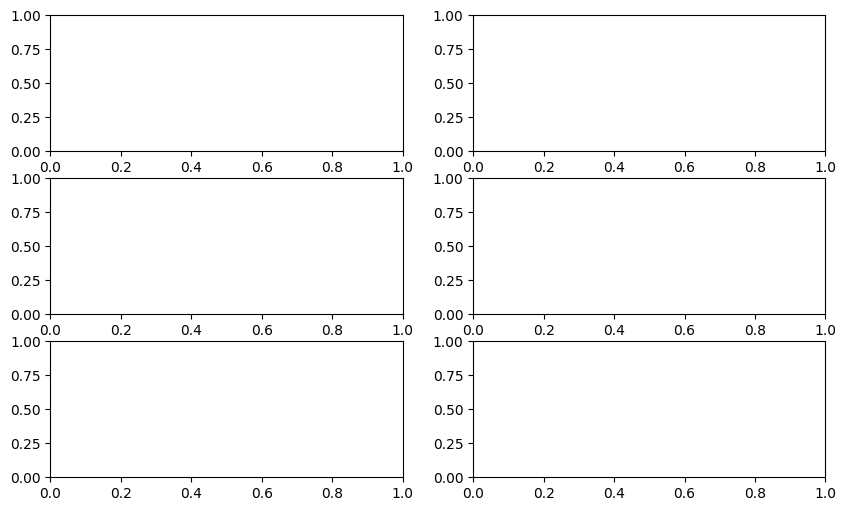

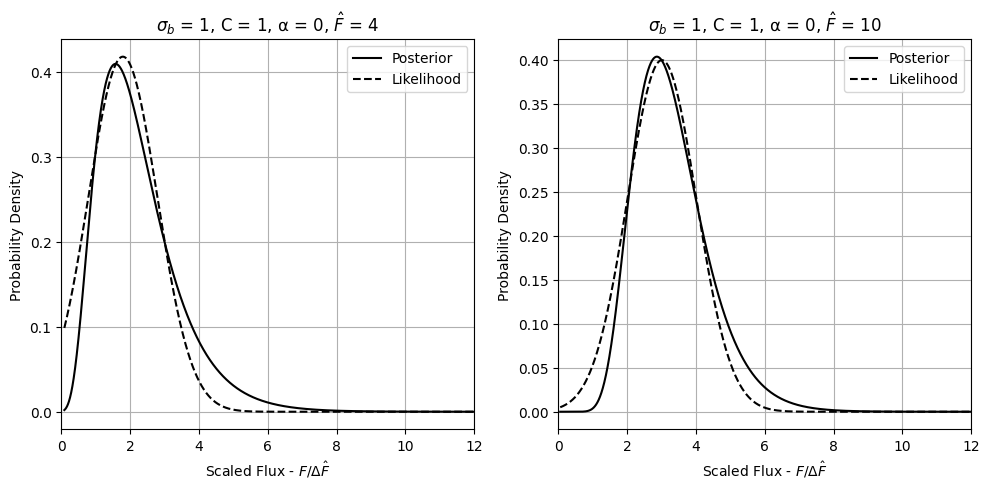

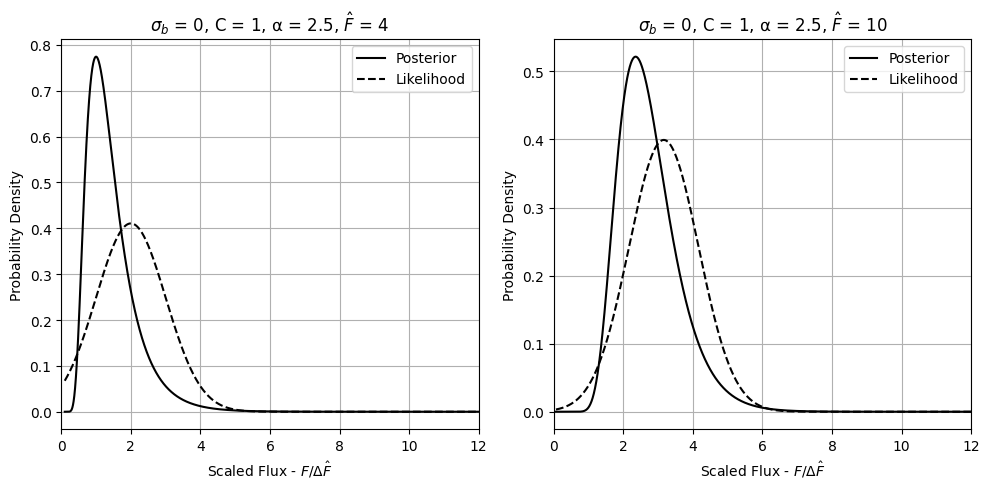

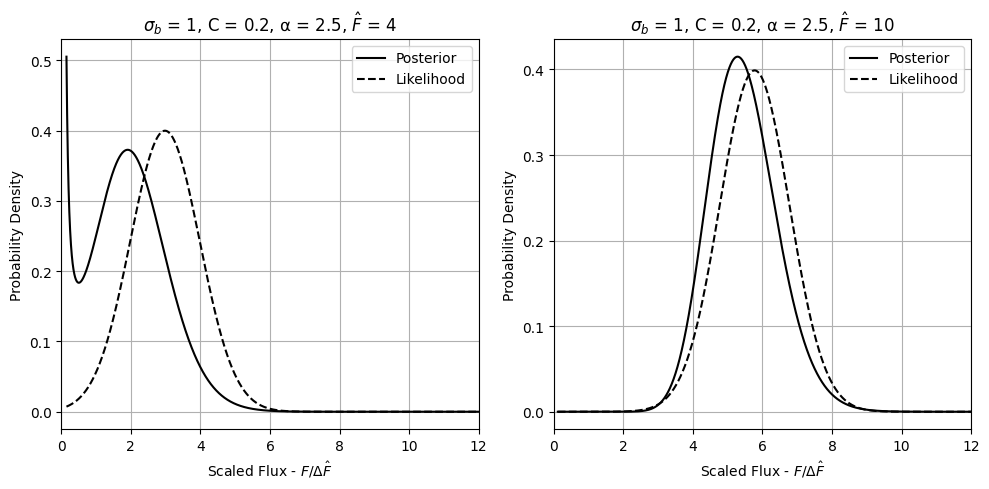

In [84]:
Fmin = 0.1
F = np.linspace(2 * Fmin, 50, 100000)

# create figure and subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 6))  # Change the figsize to (10, 6)
counter =0
# loop over parameter list
param_list = [(1, 1, 0), (0, 1, 2.5), (1, 0.2, 2.5)]
for i, param in enumerate(param_list):
    # unpack parameter values
    sigma_b = param[0]
    C = param[1]
    alpha = param[2]

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Change the figsize to (10, 6)
    counter += 1
    for j, F_hat in enumerate([4, 10]):
        # calculate posterior and likelihood
        delta_F = (sigma_b ** 2 + C * F_hat) ** 0.5
        sigma = sigma_b ** 2 + C * F
        post = ((F > Fmin) * F ** (-alpha) * np.exp(-0.5 * (F_hat - F) ** 2 / sigma) / sigma ** 0.5).reshape(-1)
        F_lik = F_hat
        lik_sd = (sigma_b ** 2 + C * F_lik) ** 0.5
        Likelihood = norm.pdf(F, loc=F_hat, scale=delta_F)
        posterior = post / np.trapz(post, F / delta_F)

        # plot data on each subplot
        axs[j].plot(F / delta_F, posterior, label='Posterior', color ="black")
        axs[j].plot(F / lik_sd, Likelihood / np.trapz(Likelihood, F / lik_sd), label='Likelihood', color = "black", linestyle = "--")
        axs[j].set_ylabel('Probability Density')
        axs[j].set_xlabel('Scaled Flux - $F/ \Delta \hat{F}$')
        axs[j].grid()
        axs[j].legend()

        # set title of each subplot
        axs[j].set_title(f"$\sigma_b$ = {sigma_b}, C = {C}, ⍺ = {alpha}, $\hat{{F}}$ = {F_hat}")
        axs[j].set_xlim(0, 12)

    # adjust layout for better spacing
    fig.tight_layout()
    #plt.savefig(f"post_{counter}")
    # show figure
    plt.show()



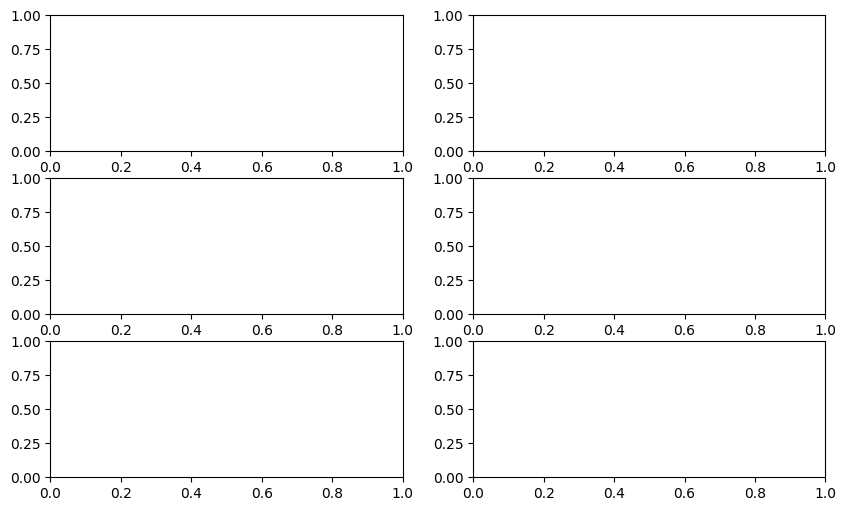

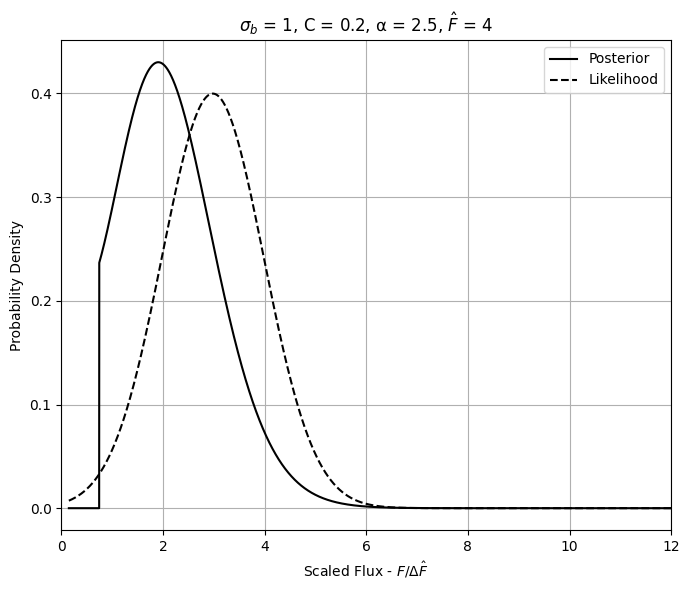

In [85]:
Fmin = 0.1
F = np.linspace(2 * Fmin, 50, 100000)

# create figure and subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 6))  # Change the figsize to (10, 6)
counter =0
# loop over parameter list
param_list = [(1, 0.2, 2.5)]
for i, param in enumerate(param_list):
    # unpack parameter values
    sigma_b = param[0]
    C = param[1]
    alpha = param[2]

    fig, axs = plt.subplots(1, 1, figsize=(7, 6))  # Change the figsize to (10, 6)
    counter += 1
    for j, F_hat in enumerate([4]):
        # calculate posterior and likelihood
        delta_F = (sigma_b ** 2 + C * F_hat) ** 0.5
        sigma = sigma_b ** 2 + C * F
        post = ((F > 1) * F ** (-alpha) * np.exp(-0.5 * (F_hat - F) ** 2 / sigma) / sigma ** 0.5).reshape(-1)
        F_lik = F_hat
        lik_sd = (sigma_b ** 2 + C * F_lik) ** 0.5
        Likelihood = norm.pdf(F, loc=F_hat, scale=delta_F)
        posterior = post / np.trapz(post, F / delta_F)

        # plot data on each subplot
        axs.plot(F / delta_F, posterior, label='Posterior', color ="black")
        axs.plot(F / lik_sd, Likelihood / np.trapz(Likelihood, F / lik_sd), label='Likelihood', color = "black", linestyle = "--")
        axs.set_ylabel('Probability Density')
        axs.set_xlabel('Scaled Flux - $F/ \Delta \hat{F}$')
        axs.grid()
        axs.legend()

        # set title of each subplot
        axs.set_title(f"$\sigma_b$ = {sigma_b}, C = {C}, ⍺ = {alpha}, $\hat{{F}}$ = {F_hat}")
        axs.set_xlim(0, 12)

    # adjust layout for better spacing
    fig.tight_layout()
    plt.savefig("truncated_post")
    # show figure
    plt.show()



In [86]:
def mortlock_post(F_hat, n):
    #average noise 
    if n!= 1:
        F_conf = 0.1 * n**(2/3)
        noise = (1.5/-0.5 * 0.1**(1.5) * (F_conf**-0.5 - 0.1**-0.5)) * n
        F_hat = F_hat - noise 
    print("sihu", F_hat)
    Fmin = 0.1
    C = 0.2
    sigma_b = 1
    alpha = 2.5
    F = np.linspace(2*Fmin, F_hat * 2, 100000) 
    sigma = sigma_b**2 + C*F
    post = ((F> Fmin ) * F**(-alpha) * np.exp(-0.5 * (F_hat - F)**2 / sigma)/ sigma**0.5).reshape(-1)
    posterior = post/ np.trapz(post, F)
    return F, posterior


In [87]:
a, b = mortlock_post(209, 100)
print(a[np.argmax(b)])
      

sihu 185.46330407009566
184.8496482128672


Simulations

In [88]:
import matplotlib
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["silver","black"])
#Cmap used normally is "gray "

In [105]:
#1 Simulation 

def simulate(sigma0, F0 = 0.1, alpha = 2.5, Fmin = 0.1, omega=1):
    #Average Number of stars (brighter than F_min) in observation space (omega_obsv)
    N_bar = (omega * sigma0 * (Fmin/F0)**(1-alpha))//1 
    #True N sampled from poisson
    N = np.random.poisson(N_bar)
    #Sample a flux for each star 
    fluxes = pareto.rvs(alpha-1, scale = Fmin, size=N)
    return fluxes

def analysis(sigma0, F0 = 0.1, alpha = 2.5, Fmin = 0.1, omega=1, noise_var = 1, m=1000):
    total_flux = np.zeros(m)
    brightest_flux = np.zeros(m)
    brightest = 0
    for i in range(m):
        fluxes = simulate(sigma0)
        flux_obsv = np.random.normal(fluxes, noise_var)
        #Total Flux
        F_tot = np.sum(fluxes)
        total_flux[i] = F_tot
        #Brightest star
        F_brightest = np.max(fluxes)
        brightest_flux[i] = F_brightest

        #Store brightest 
        if F_brightest > brightest:
            brightest = F_brightest
            flux_dist = fluxes

    return total_flux, brightest_flux, flux_dist

total_flux, brightest_flux, flux_dist, tf_obsv, bf_obsv = analysis(10000)

#Brightest vs total plot
plt.scatter(total_flux, brightest_flux, s = 10, color="black")
plt.plot(np.arange(0, np.max(total_flux), 1), np.arange(0, np.max(total_flux), 1), "--", color = "black", label = "y = x")
plt.ylabel("Maximum Flux")
plt.xlabel("Total Flux")
plt.title("Relationship between Total and Maximum Flux")
plt.legend()
#plt.savefig("Totalvsmax")
plt.show()




ValueError: not enough values to unpack (expected 5, got 3)

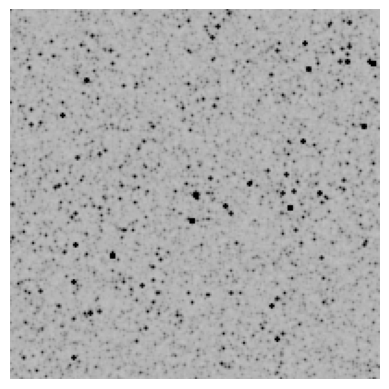

In [90]:
def location(fluxes, m):
    """Give fluxes a location in space 
    Centers the brightest star
    m - size of grid 
    """
    N = len(fluxes)
    #for an mxm grid pick  a random point for each flux value.
    x = np.random.choice(np.arange(0, m, 1), N, replace=True)
    y = np.random.choice(np.arange(0, m, 1), N, replace=True)

    #Move Brightest star to the center - since location of other stars is independent we dont need to worry about this translation
    brightest = np.argmax(fluxes)
    x[brightest] = m//2
    y[brightest] = m//2

    grid = np.zeros((m, m))
    for i in range(N):
        grid[x[i], y[i]] = fluxes[i]

    return grid

def visualise(fluxes, m, sat_index = 1/6, sigma=1, min_flux=0.1):
    """
    m - size of grid
    """
    grid = location(fluxes, m)
    normal_spread = gaussian_filter(grid, sigma)

    #Saturation
    normal_spread[normal_spread>=sat_index] = sat_index
    #Black stays black
    #normal_spread[normal_spread<=min_flux] = 0

    plt.imshow(normal_spread, cmap=cmap)
    plt.axis("off")
    plt.show()
    return

#Square like objects is a symptom of a small grid-size 
#lowering grid size too much makes objects seem too faint 
tflux = simulate(sigma0=1000, F0=2)
visualise(tflux, 200, sat_index=2, sigma=0.6)


In [91]:
def simulate(n):
    #Average Number of stars (brighter than F_min) in observation space (omega_obsv)
    N = np.random.poisson(n)
    fluxes = pareto.rvs(2.5-1, scale = Fmin, size=N)
    return fluxes
def sim(n, num_sims):
    """
    n - number of sources on average
    num_sims - number of simulations to run
    """
    simulations = []
    for i in tqdm(range(num_sims)):
        simulations.append(np.sum(simulate(n)))
    #plt.hist(np.sort(simulations)[:int(0.99*num_sims)], bins=100, density=True, alpha =1, color="black")
    return np.sort(simulations)[:int(0.999*num_sims)]

def simulate_with_xmax(xmax, n):
    #Average Number of stars (brighter than F_min) in observation space (omega_obsv)
    true_n = np.random.poisson(n)
    #pareto_vals = pareto.pdf(x, b=1.5, scale=0.1)
    #fluxes = np.random.choice(x, true_n, p=pareto_vals/np.sum(pareto_vals))
    if true_n == 0:
        return 0 
    else:
        fluxes = np.zeros(true_n)
        for i in range(true_n):
            flux = xmax + 1
            while flux > xmax:
                flux = pareto.rvs(2.5-1, scale = Fmin)
            fluxes[i] = flux
        return fluxes

def sim_with_xmax(xmax, n, num_sims):
    """
    xmax - max flux 
    n - number of sources on average
    num_sims - number of simulations to run
    """
    simulations = []
    for i in tqdm(range(num_sims)):
        simulations.append(np.sum(simulate_with_xmax(xmax, n)))
    #plt.hist(simulations, bins=100, density=True)

    return np.array(simulations) + xmax

In [92]:
def marginal(s_max, n):
    """
    Input : 
    s_max - max flux
    n = expected number of sources
    """
    N = 1000000
    x_max = 10000
    T = x_max/N     # Sampling interval
    num_vals = int(s_max * 1/T)
    # Discretize the PDF
    up_to_smax = np.linspace(0, s_max, num_vals, endpoint=False)

    pdf_values_full = np.zeros(N)
    pdf_values = pareto.pdf(up_to_smax, b=1.5, scale = 0.1)
    pdf_values_full[:num_vals] = pdf_values

    pdf_values_full = pdf_values_full/np.sum(pdf_values)

    # Numerical Fourier Transform of the Pareto PDF
    P_omega = np.fft.fft(pdf_values_full)
    # Scale and account for deterministic number of sources 
    exp_nP = np.exp(n*P_omega - n)

    # Compute the full frequency array for IFT
    full_exp_nP = np.concatenate([exp_nP, np.conj(exp_nP[::-1])])

    # Inverse Fourier Transform
    x = np.fft.fftfreq(N, T)[:N//2]
    x = x/((1000/x_max)**2)
    ift_result = np.fft.ifft(full_exp_nP)
    ift_result=ift_result[::2][:N//2]
    ift_result_normalised = -np.abs(ift_result)/np.trapz(x, np.abs(ift_result))
    a = int(1 * len(x))

    return s_max + x[:a], ift_result_normalised[:a]

100%|██████████| 1000/1000 [00:01<00:00, 625.93it/s]


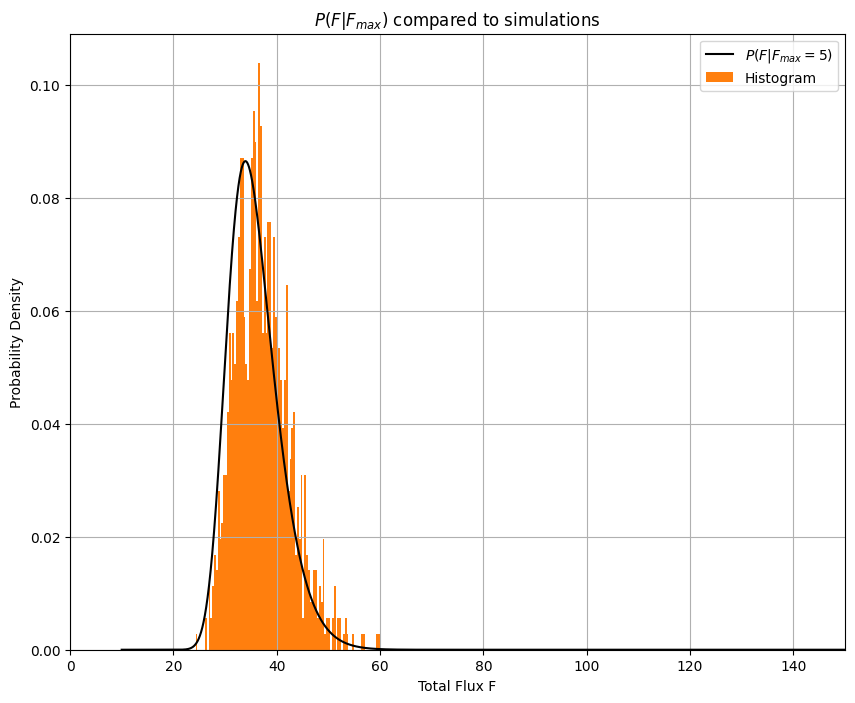

In [93]:
smax = 10
n = 100
c, d = marginal(smax, n)
a= sim_with_xmax(smax,n, 1000)

plt.figure(figsize=(10, 8))
# Plot the line plot
plt.plot(c, d, label='$P(F|F_{max} = 5)$', color = "black")
# Plot the histogram
plt.hist(a, bins=100, density=True, label='Histogram', color = "tab:orange")
plt.xlabel("Total Flux F")
plt.ylabel("Probability Density")
plt.title("$P(F|F_{max})$ compared to simulations")
# Add grid and legend
plt.grid()
plt.legend()
plt.xlim(0, 150)
# Show the plot
#plt.savefig("P(F|F_max)")
plt.show()

In [81]:
def marginal_without_trunc(n):
    x_max = 10000
    N = 1000000
    T = x_max/N  # Sampling interval
    # Discretize the PDF
    x_values = np.linspace(0, x_max, N, endpoint=False)

    pdf_values = pareto.pdf(x_values, b=1.5, scale = 0.1)
    pdf_values = pdf_values/np.sum(pdf_values)

    # Numerical Fourier Transform of the Pareto PDF
    P_omega = np.fft.fft(pdf_values)
    # Scale and account for deterministic number of sources 
    exp_nP = np.exp(n*P_omega - n)

    # Compute the full frequency array for IFT
    full_exp_nP = np.concatenate([exp_nP, np.conj(exp_nP[::-1])])

    # Inverse Fourier Transform
    x = np.fft.fftfreq(N, T)[:N//2]
    x = x/(1000/x_max)**2
    ift_result = np.fft.ifft(full_exp_nP)
    ift_result=ift_result[::2][:N//2]
    ift_result_normalised = -np.abs(ift_result)/np.trapz(x, np.abs(ift_result))
    a = int(1*len(x))

    return x[:a], ift_result_normalised[:a]

a, b = marginal_without_trunc(100)
c = sim(100, 10000)

plt.figure(figsize=(10, 8))
plt.plot(a,b, label='P(F)', color ="black")
plt.hist(c, bins=1000, density=True, label='Histogram', color = "tab:orange")
plt.xlabel("Total Flux F")
plt.ylabel("Probability Density")
plt.title("$P(F)$ compared to simulations")
plt.grid()
plt.legend()
plt.xlim(0, 150)

# Show the plot
#plt.savefig("P(F)")
plt.show()

  0%|          | 0/10000 [00:00<?, ?it/s]


NameError: name 'Fmin' is not defined

Text(0.5, 1.0, '$P(F_{max})$ distribution')

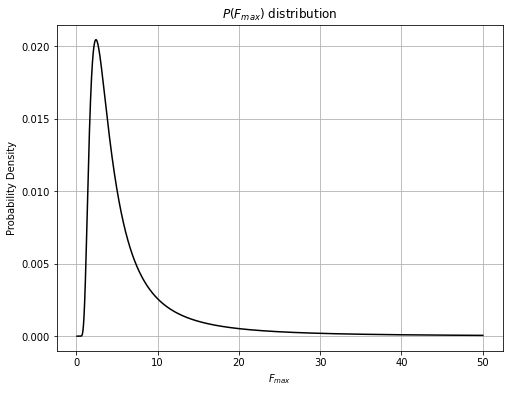

In [15]:
def prior_func(f, n):
    prior= f**(-2.5)
    eterm = np.exp(-n * (0.1/f)**(1.5))
    return prior * eterm

f = np.linspace(0.1,50, 10000)
plt.figure(figsize=(8,6))
plt.plot(f, prior_func(f, n), color="black")
plt.grid()
plt.ylabel("Probability Density")
plt.xlabel("$F_{max}$")
plt.title("$P(F_{max})$ distribution")
#plt.savefig("P(F_max)")

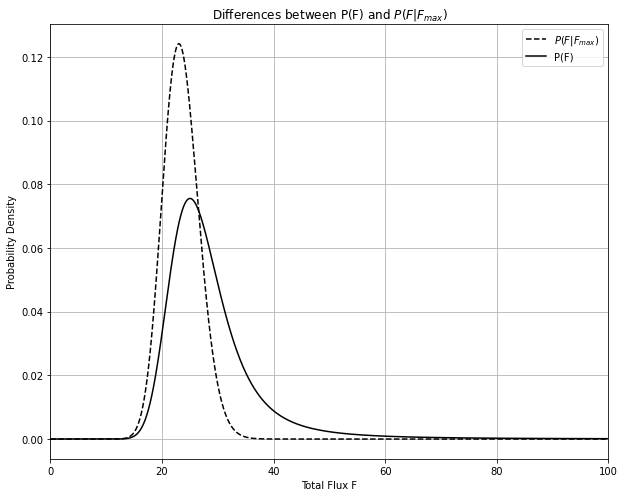

In [223]:
fmax = 2
a, b = marginal(fmax, 100)
c,d = marginal_without_trunc(100)

plt.figure(figsize=(10, 8))
plt.plot(np.array(a) - fmax,b, label='$P(F|F_{max})$', color ="black", linestyle="--")
plt.plot(c,d, label='P(F)', color ="black")
plt.xlabel("Total Flux F")
plt.ylabel("Probability Density")
plt.title("Differences between P(F) and $P(F|F_{max})$")
plt.grid()
plt.legend()
plt.xlim(0, 100)

# Show the plot
#plt.savefig("P(F) vs P(F|Fmax")
plt.show()

### 
POSTERIOR TIME BABY 

In [95]:
def posterior(F_obsv, n):
    #range of max fluxes to consider
    min_fmax = max(F_obsv - 0.3 * n - 30, 0.1)
    max_fmax = F_obsv + 5
    F_max_list = np.linspace(min_fmax, max_fmax, 1000)
    #Range of fluxes to consider
    min_f = max(F_obsv - 5, 0.1)
    max_f = F_obsv + 5
    F_list = np.linspace(min_f, max_f, 50000)
    #Distribution of total fluxes only given n 
    total_flux, total_flux_density = marginal_without_trunc(n)
    #Gives the value at points 
    g = interpolate.interp1d(total_flux, total_flux_density, bounds_error=False, fill_value=0)
    pF = g(F_list)
    normal_noise = norm.pdf(F_list, loc=F_obsv, scale = 1)
    prior = prior_func(F_max_list, n)
    integral_list = []
    #X-values for posterior is fmax
    for fmax in tqdm(F_max_list):
        #for each f max we integrate over F
        x, marg_y = marginal(fmax, n)
        h = interpolate.interp1d(x, marg_y, bounds_error=False, fill_value=0)
        marginalf = h(F_list)
        post_prod = marginalf * normal_noise /pF
        integral_val = np.trapz(F_list, post_prod)
        integral_list.append(integral_val)
    post = np.array(integral_list)*prior / np.trapz(np.array(integral_list)*prior, F_max_list)
    return F_max_list, post

In [482]:
i = 1
a, b = mortlock_post(10, 1)
c, d = posterior(10, i)
c, d = remove_nan_values(c,d)
#c, d= smooth_posterior(c,d, sigma =5)
d = d/np.trapz(d, c)


plt.figure(figsize=(10,8))
plt.plot(a, b, label = "Single-source model", linestyle="--", color = "black")
plt.plot(c, d, label="Multi-source model", color = "black")
plt.legend()
plt.grid()
plt.xlabel("Flux")
plt.ylabel("Probability Density")
plt.title("Posterior Distributions of flux estimates: Single-source vs Multi-source model")
#plt.savefig("modelcomp1")
plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]/var/folders/zh/7zp_8xb91cj2g3jy1m3w7kp40000gn/T/ipykernel_45585/3380899014.py:18: RuntimeWarning: invalid value encountered in true_divide
  pdf_values_full = pdf_values_full/np.sum(pdf_values)
 41%|████▏     | 413/1000 [00:39<00:55, 10.51it/s]


KeyboardInterrupt: 

sihu 9.190578174668389


100%|██████████| 1000/1000 [02:06<00:00,  7.89it/s]


sihu 7.972444836525338


100%|██████████| 1000/1000 [02:06<00:00,  7.90it/s]


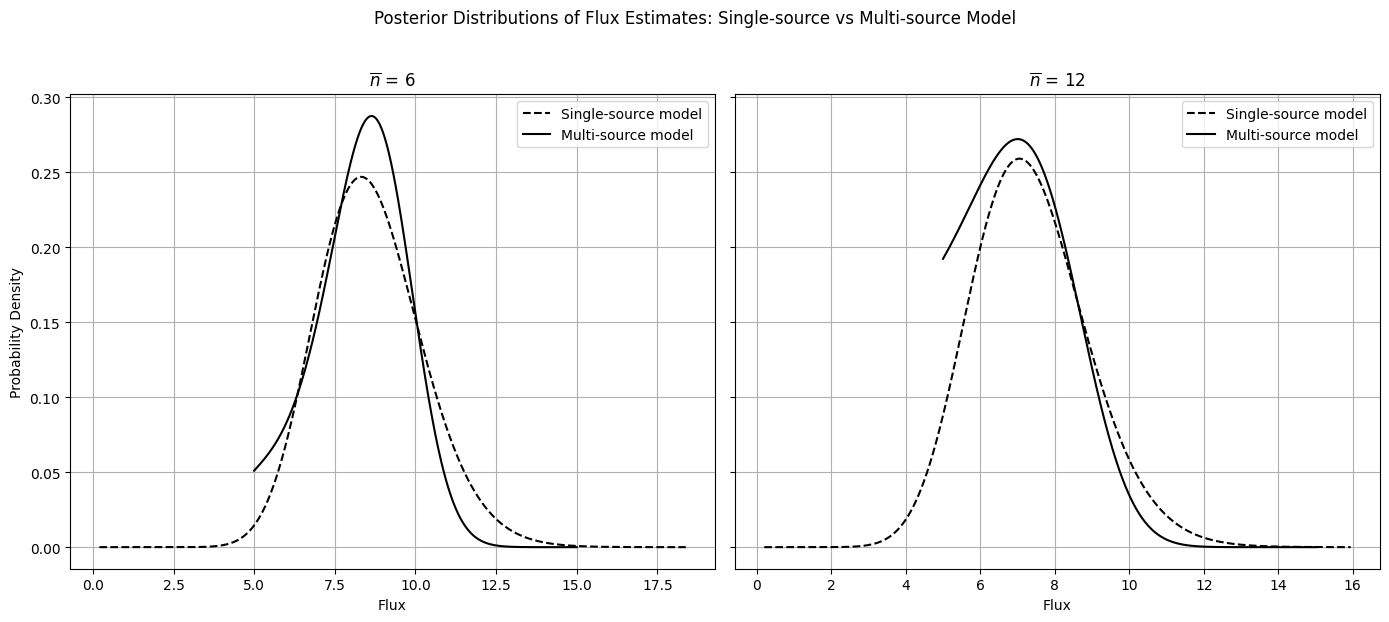

In [137]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming mortlock_post, posterior, remove_nan_values, and smooth_posterior are defined
# Define the function and other necessary steps here

# Data for n = 6
n1 = 6
a1, b1 = mortlock_post(10, n1)
c1, d1 = posterior(10, n1)
c1, d1 = remove_nan_values(c1, d1)
# c1, d1 = smooth_posterior(c1, d1, sigma=5)
d1 = d1 / np.trapz(d1, c1)

# Data for n = 12
n2 = 12
a2, b2 = mortlock_post(10, n2)
c2, d2 = posterior(10, n2)
#c2, d2 = remove_nan_values(c2, d2)
# c2, d2 = smooth_posterior(c2, d2, sigma=5)
d2 = d2 / np.trapz(d2, c2)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for n = 6
axs[0].plot(a1, b1, label="Single-source model", linestyle="--", color="black")
axs[0].plot(c1, d1, label="Multi-source model", color="black")
axs[0].legend()
axs[0].grid()
axs[0].set_xlabel("Flux")
axs[0].set_ylabel("Probability Density")
axs[0].set_title("$\\overline{n}$ = 6")

# Plot for n = 12
axs[1].plot(a2, b2, label="Single-source model", linestyle="--", color="black")
axs[1].plot(c2, d2, label="Multi-source model", color="black")
axs[1].legend()
axs[1].grid()
axs[1].set_xlabel("Flux")
axs[1].set_title("$\\overline{n}$ = 12")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle("Posterior Distributions of Flux Estimates: Single-source vs Multi-source Model", y=1.03)
plt.savefig("modelcomp_comparison", bbox_inches='tight')
plt.show()


100%|██████████| 1000/1000 [01:31<00:00, 10.91it/s]


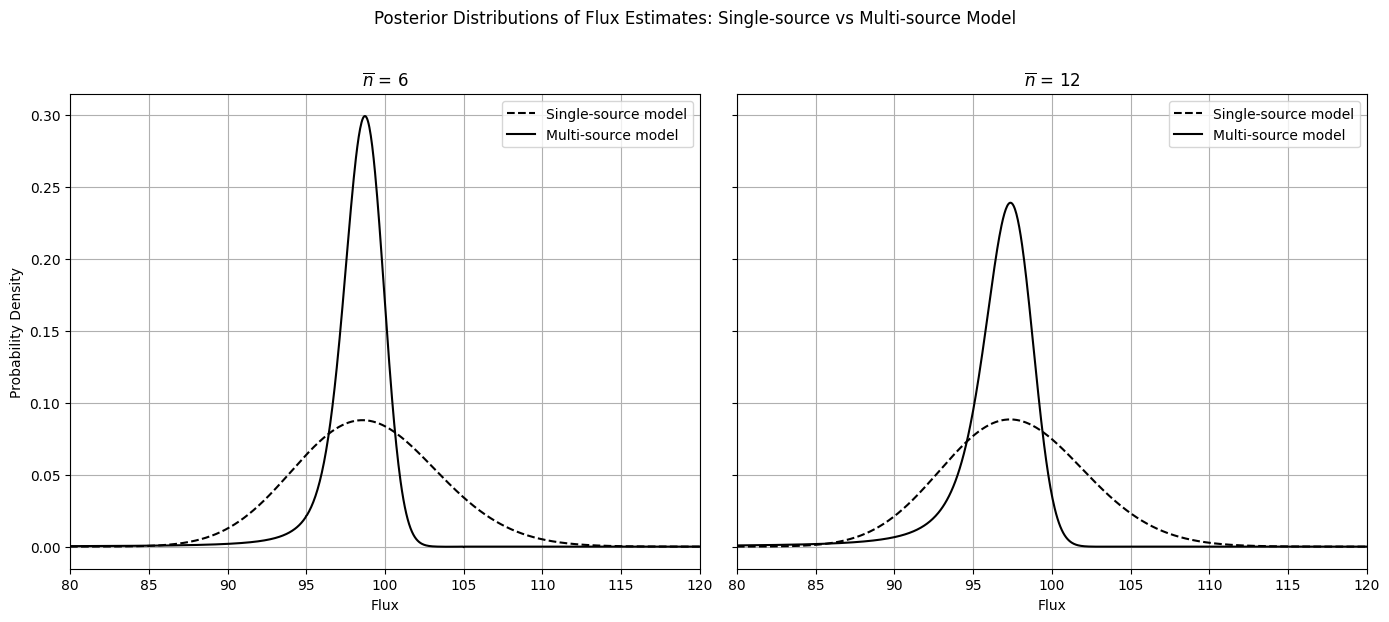

In [485]:


# Data for n = 6
n1 = 6
f_hat = 100
a1, b1 = mortlock_post(f_hat, n1)
c1, d1 = posterior(f_hat, n1)
c1, d1 = remove_nan_values(c1, d1)
# c1, d1 = smooth_posterior(c1, d1, sigma=5)
d1 = d1 / np.trapz(d1, c1)

# Data for n = 12
n2 = 12
a2, b2 = mortlock_post(f_hat, n2)
c2, d2 = posterior(f_hat, n2)
c2, d2 = remove_nan_values(c2, d2)
# c2, d2 = smooth_posterior(c2, d2, sigma=5)
d2 = d2 / np.trapz(d2, c2)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for n = 6
axs[0].plot(a1, b1, label="Single-source model", linestyle="--", color="black")
axs[0].plot(c1, d1, label="Multi-source model", color="black")
axs[0].legend()
axs[0].grid()
axs[0].set_xlabel("Flux")
axs[0].set_ylabel("Probability Density")
axs[0].set_title("$\\overline{n}$ = 6")
axs[0].set_xlim(80, 120)

# Plot for n = 12
axs[1].plot(a2, b2, label="Single-source model", linestyle="--", color="black")
axs[1].plot(c2, d2, label="Multi-source model", color="black")
axs[1].legend()
axs[1].grid()
axs[1].set_xlabel("Flux")
axs[1].set_title("$\\overline{n}$ = 12")
axs[1].set_xlim(80, 120)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle("Posterior Distributions of Flux Estimates: Single-source vs Multi-source Model", y=1.03)
plt.savefig("modelcomp_comparison100", bbox_inches='tight')
plt.show()


In [192]:
def normal_approx(F_hat, n):

    fmax = np.linspace(max(F_hat - 0.3 * n - 30, 0.1)
, F_hat + 5, 100000)
    f_avg = -3 *0.1**1.5 * (fmax**(-0.5) - 0.1**(-0.5))
    f_total_avg = n*f_avg
    F = fmax + f_total_avg
    var = 3*0.1**1.5 *(fmax**(0.5) - 0.1**(0.5)) - (f_avg)**2
    total_var = n*(f_avg**2 + var) +1
    post = np.exp(-((F_hat - F)**2)/(2 * total_var))/np.sqrt(total_var)
    if fmax[0] > 1000:
        post = post
    else:
        post = post * prior_func(fmax, n)
    post = post/np.trapz(post, fmax)

    return fmax, post

sihu 7.972444836525338


  0%|          | 0/1000 [00:00<?, ?it/s]/var/folders/zh/7zp_8xb91cj2g3jy1m3w7kp40000gn/T/ipykernel_957/1541629158.py:18: RuntimeWarning: invalid value encountered in true_divide
  pdf_values_full = pdf_values_full/np.sum(pdf_values)
100%|██████████| 1000/1000 [02:09<00:00,  7.74it/s]


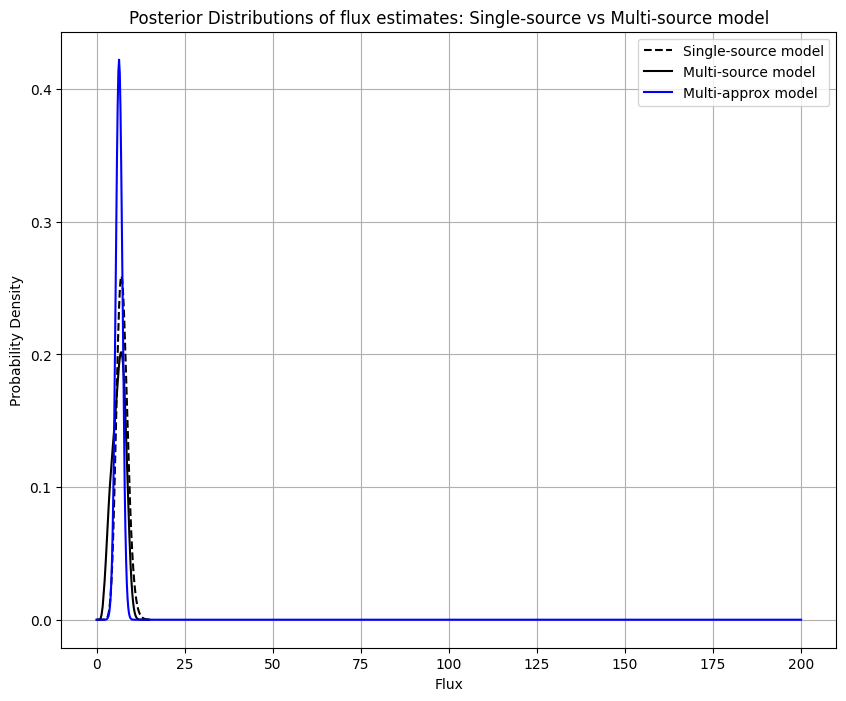

In [143]:
def posterior(F_obsv, n):
    #range of max fluxes to consider
    min_fmax = 0.1
    max_fmax = F_obsv + 5
    F_max_list = np.linspace(min_fmax, max_fmax, 1000)
    #Range of fluxes to consider
    min_f = max(F_obsv - 5, 0.1)
    max_f = F_obsv + 5
    F_list = np.linspace(min_f, max_f, 10000)
    #Distribution of total fluxes only given n 
    total_flux, total_flux_density = marginal_without_trunc(n)
    #Gives the value at points 
    g = interpolate.interp1d(total_flux, total_flux_density, bounds_error=False, fill_value=0)
    pF = g(F_list)
    normal_noise = norm.pdf(F_list, loc=F_obsv, scale = 1)
    prior = prior_func(F_max_list, n)
    integral_list = []
    #X-values for posterior is fmax
    for fmax in tqdm(F_max_list):
        #for each f max we integrate over F
        x, marg_y = marginal(fmax, n)
        h = interpolate.interp1d(x, marg_y, bounds_error=False, fill_value=0)
        marginalf = h(F_list)
        post_prod = marginalf * normal_noise /pF
        integral_val = np.trapz(F_list, post_prod)
        integral_list.append(integral_val)
    return F_max_list, -np.array(integral_list)*prior

i = 12
S = 10
a, b = mortlock_post(S, i)
c, d = posterior(S, i)
c, d = remove_nan_values(c,d)
#c, d= smooth_posterior(c,d, sigma =5)
d = d/np.trapz(d, c)
p, q = normal_approx(S, i)


plt.figure(figsize=(10,8))
plt.plot(a, b, label = "Single-source model", linestyle="--", color = "black")
plt.plot(c, d, label="Multi-source model", color = "black")
plt.plot(p, q, label="Multi-approx model", color = "blue")
plt.legend()
plt.grid()
plt.xlabel("Flux")
plt.ylabel("Probability Density")
plt.title("Posterior Distributions of flux estimates: Single-source vs Multi-source model")
#plt.savefig("modelcomp1")
plt.show()

Predictions

In [109]:
n=1000

total_flux, brightest_flux, flux_dist = analysis(n)
total_flux, brightest_flux = sort_linked_lists(total_flux, brightest_flux)


def predict(total_flux, n):
    max_flux_prediction = []
    lower_list = []
    upper_list = []
    mortlock_mle = []
    normal_mle = []
    for flux in tqdm(total_flux):

        #True density values
        fluxes, probs = posterior(flux, n)
        lower, upper = conf_interval(fluxes, probs)
        lower_list.append(lower)
        upper_list.append(upper)
        max_ind = np.argmax(probs)
        max_flux_prediction.append(fluxes[max_ind])

        #mortlock posterior MLE 
        mort_fluxes, mort_probs = posterior(flux, n)
        mortlock_mle.append(mort_fluxes[np.argmax(mort_probs)])

        #Normal Approx MLE
        norm_flux, norm_post = normal_approx(flux, n)
        normal_mle.append(norm_flux[np.argmax(norm_post)])



    return max_flux_prediction, lower_list, upper_list, mortlock_mle, normal_mle

mle, lower, upper, mortlock_mle, normal_mle = predict(total_flux[-10:], n)



100%|██████████| 10/10 [28:02<00:00, 168.29s/it]


In [110]:
print(total_flux[-10:])
print(brightest_flux[-10:])
print(mle)
print(mortlock_mle)
print(normal_mle)

[542.1259007364819, 553.7506056688077, 612.3915515120466, 616.755944176442, 626.0368233177629, 652.7802404220413, 694.8740475655488, 940.2226216395647, 1150.294981829849, 1621.7438888877791]
[235.87758583537604, 223.70593906213, 309.188017840453, 353.7329337028291, 332.8813500071103, 344.0707367018319, 413.0774185366879, 651.7808007143067, 875.9819001516513, 1287.951303875941]
[273.1569317675129, 285.11697203517406, 344.42858854908366, 348.79298121347904, 358.0738603548, 385.15261279441364, 427.58175527325653, 673.9363353532784, 884.3440308788979, 1356.4636086074988]
[273.1569317675129, 285.11697203517406, 344.42858854908366, 348.79298121347904, 358.0738603548, 385.15261279441364, 427.58175527325653, 673.9363353532784, 884.3440308788979, 1356.4636086074988]
[232.12825373322383, 243.95301585343447, 303.4478670590865, 307.8675621198035, 317.26904725952323, 344.3156004294137, 386.8382425624138, 633.824329266129, 844.7172682415738, 1317.2479298006217]


Normal Approximation 

sihu 50.259855680060184


100%|██████████| 1000/1000 [01:24<00:00, 11.80it/s]


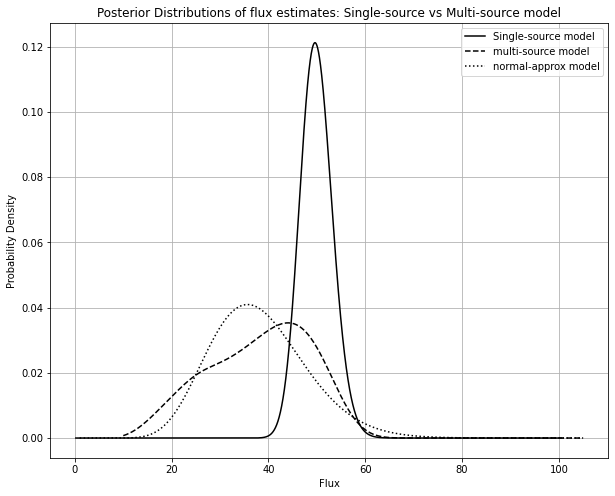

In [48]:


f = 100
n = 200
a, b = mortlock_post(f, n)
e, g = normal_approx(f, n)
c, d = posterior(f, n)
plt.figure(figsize=(10,8))
plt.plot(a, b, label = "Single-source model", color = "black")
plt.plot(c, d, label = "multi-source model", linestyle="--", color = "black")
plt.plot(e, g, label="normal-approx model", color = "black", linestyle = ":")
plt.legend()
plt.grid()
plt.xlabel("Flux")
plt.ylabel("Probability Density")
plt.title("Posterior Distributions of flux estimates: Single-source vs Multi-source model")
#plt.savefig("modelcomp1")
plt.show()

QQ plot 


In [182]:
import scipy.stats as stats

#Metropolis Hastings Sampler 

#proposal density 
F_obsv = 200
n = 100
variance = 0.8


def proposal(x0):
    x1 = np.random.normal(loc=x0, scale=variance)
    while x1 <0:
        x1 = np.random.normal(loc=x0, scale=variance)
    return x1

def accept(x1, x0, density):
    acceptance = density(x1) * norm.pdf(x0, loc=x1, scale=variance) / (density(x0) * norm.pdf(x1, loc=x0, scale=variance))
    return min(1, acceptance)

def metropolis(Xinit, density, N=500000):
    samples = []
    x0 = Xinit
    for i in range(N):
        x1 = proposal(x0)
        u = np.random.sample()
        if u < accept(x1, x0, density):
            x0 = x1
        samples.append(x1)
        
    return samples[30000:]

mean_val = F_obsv - 0.3 * n

#Posterior sampler 
#fmax, density = posterior(F_obsv, n)


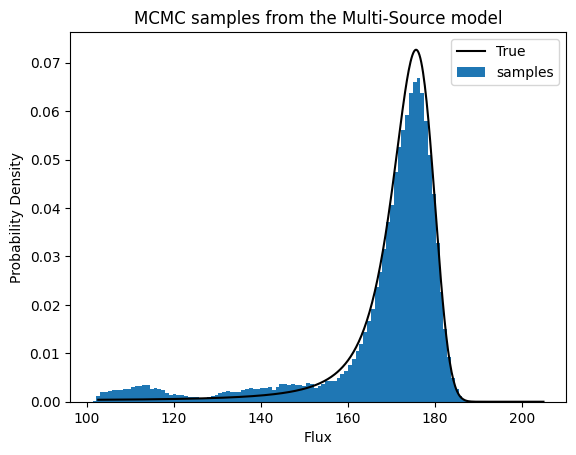

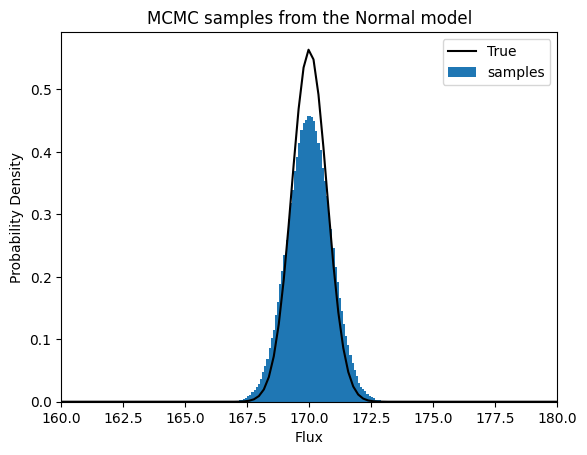

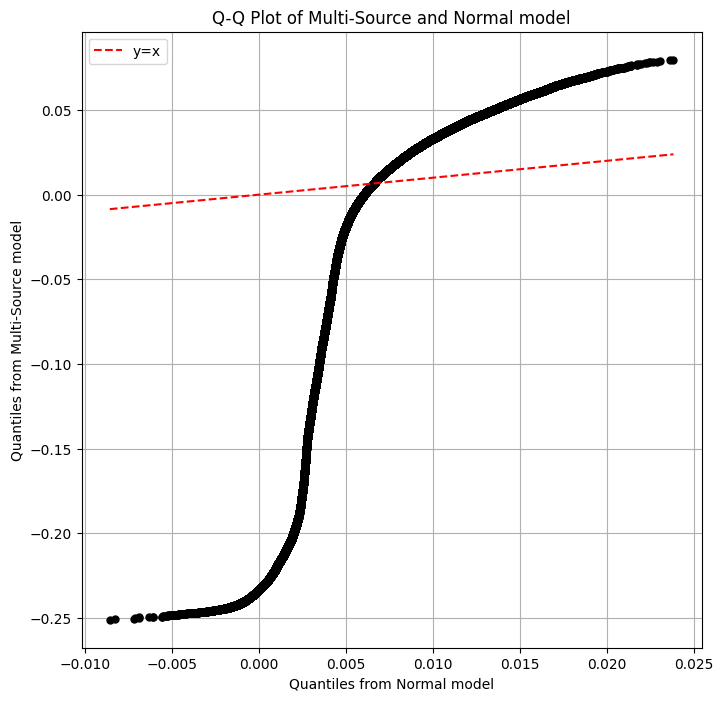

In [175]:


reg = int(len(fmax) * 0.5)
post_interp = interpolate.interp1d(fmax[reg:], density[reg:], bounds_error=False, fill_value=0)
samples = metropolis(mean_val, post_interp)
density2 = density[reg:] / np.trapz(density[reg:], fmax[reg:])
plt.plot(fmax[reg:], density2, label ="True", color = "black")
plt.hist(samples, density=True, bins=100, label ="samples")
plt.xlabel('Flux')
plt.ylabel('Probability Density')
plt.title('MCMC samples from the Multi-Source model')
plt.legend()
plt.savefig("MCMC multi")
plt.show()


#standardise samples
mean_samples = np.mean(np.array(samples))
samples_array = np.array(samples) - mean_samples
var_samples = np.var(samples_array)
samples_array = samples_array / var_samples

#normal samples 
norm_flux, norm_density = normal_approx(F_obsv, n)
n_len_low = int(len(norm_flux)*0.7)
n_len_hi = int(len(norm_flux)*0.9)
norm_mid = norm_flux[n_len_low:n_len_hi]
norm_mid_dens = norm_density[n_len_low:n_len_hi]
norm_mid_dens = norm_mid_dens / np.trapz(norm_mid_dens,norm_mid )
norm_interp = interpolate.interp1d(norm_mid, norm_mid_dens, bounds_error=False, fill_value=0)
norm_samples = metropolis(mean_val, norm_interp)

plt.plot(norm_mid, norm_mid_dens, label ="True", color = "black")
plt.hist(norm_samples, density=True, bins=100, label ="samples")
plt.xlabel('Flux')
plt.ylabel('Probability Density')
plt.title('MCMC samples from the Normal model')
plt.legend()
plt.xlim(160, 180)

plt.savefig("MCMC normal")
plt.show()

norm_samples = np.array(norm_samples) - mean_samples
norm_samples = norm_samples/var_samples

samples_array = np.sort(samples_array)
norm_samples = np.sort(norm_samples)


# Step 3: Plot the Q-Q plot using matplotlib
plt.figure(figsize=(8, 8))
plt.plot(norm_samples, samples_array, 'o', markersize=5, color ="black")
plt.xlabel('Quantiles from Normal model')
plt.ylabel('Quantiles from Multi-Source model')
plt.title('Q-Q Plot of Multi-Source and Normal model')
plt.grid(True)
plt.plot([min(norm_samples), max(norm_samples)], [min(norm_samples), max(norm_samples)], 'r--', label = "y=x")
plt.legend()
plt.savefig("QQ")
plt.show()



Error Plots 